Количество образцов: 569
Количество признаков: 30

Классы: ['malignant' 'benign']


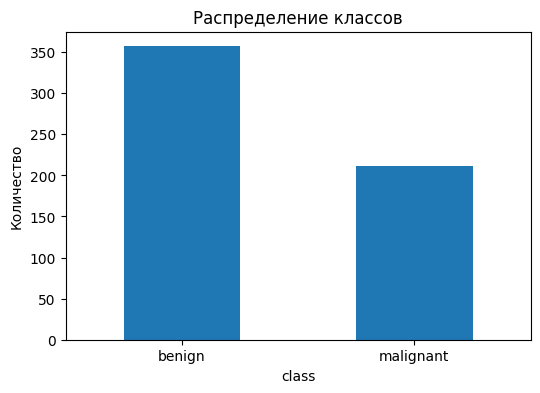

Точность модели: 0.956

Отчет о классификации:
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



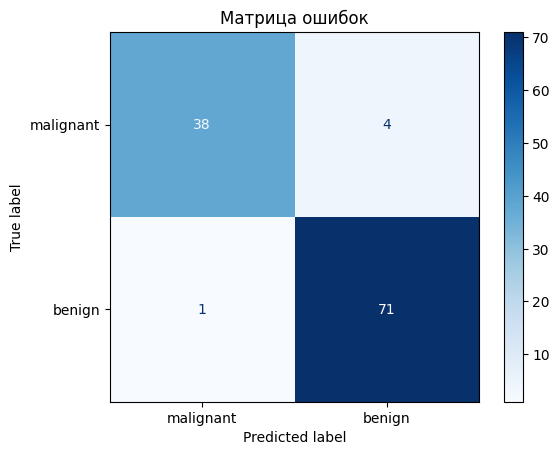

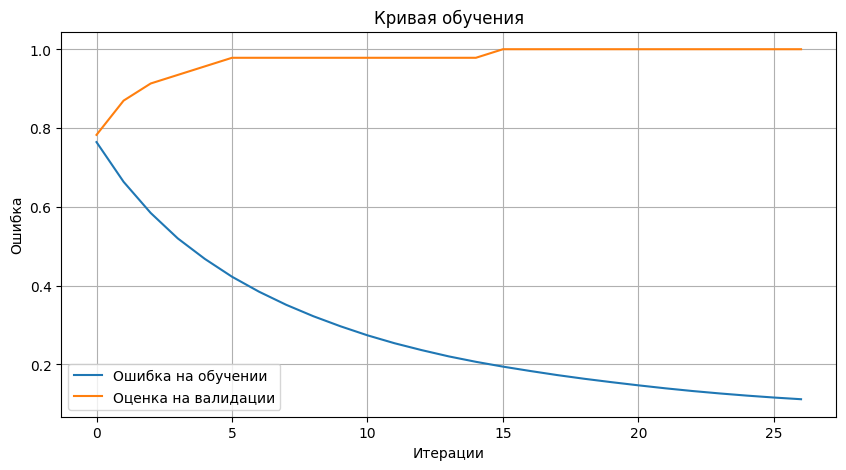

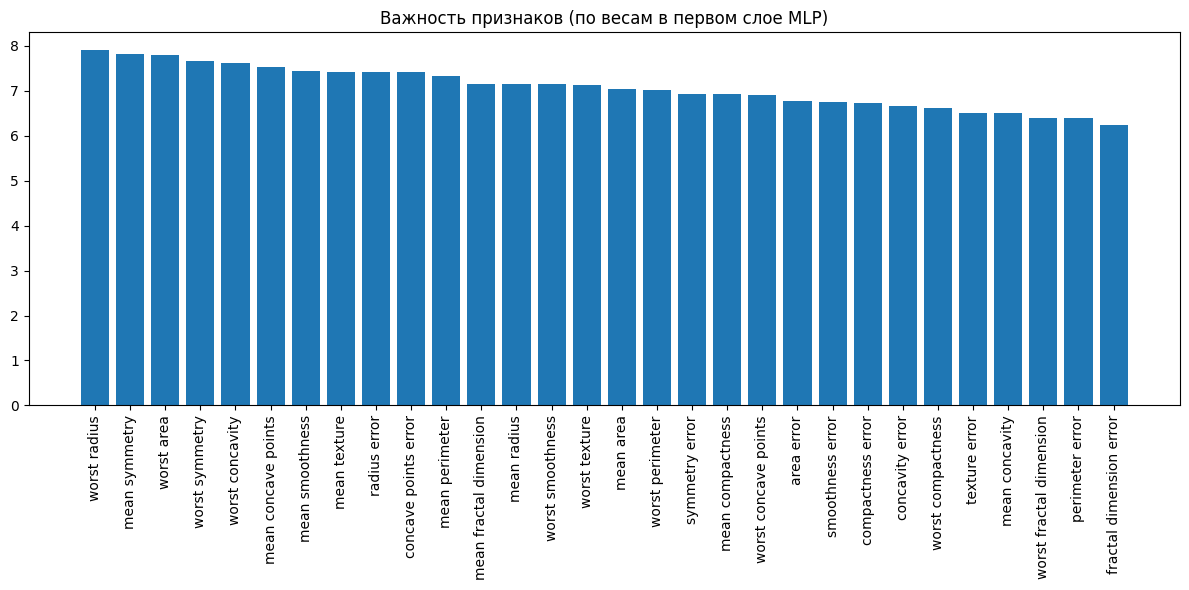

In [1]:
# %% [markdown]
## Классификация опухолей молочной железы с помощью MLPClassifier

### Цель задачи
# Продемонстрировать работу нейронной сети MLPClassifier на встроенном медицинском датасете.
# Необходимо предсказать, является ли опухоль злокачественной или доброкачественной.

# %%
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# %% [markdown]
### Загрузка и анализ данных
# %%
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['class'] = df['target'].map({i: name for i, name in enumerate(target_names)})

print(f"Количество образцов: {X.shape[0]}")
print(f"Количество признаков: {X.shape[1]}")
print("\nКлассы:", target_names)

# Распределение классов
plt.figure(figsize=(6, 4))
df['class'].value_counts().plot(kind='bar')
plt.title("Распределение классов")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()

# %% [markdown]
### Подготовка данных
# %%
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# %% [markdown]
### Обучение модели
# %%
mlp = MLPClassifier(hidden_layer_sizes=(50, 30),
                    activation='relu',
                    solver='adam',
                    max_iter=1000,
                    random_state=42,
                    early_stopping=True,
                    validation_fraction=0.1)

mlp.fit(X_train_scaled, y_train)

# %% [markdown]
### Оценка модели
# %%
y_pred = mlp.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.3f}")

print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.show()

# Кривая обучения
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_, label="Ошибка на обучении")
if hasattr(mlp, 'validation_scores_'):
    plt.plot(mlp.validation_scores_, label="Оценка на валидации")
plt.xlabel("Итерации")
plt.ylabel("Ошибка")
plt.title("Кривая обучения")
plt.grid()
plt.legend()
plt.show()

# %% [markdown]
### Интерпретация результатов
# %%
if hasattr(mlp, 'coefs_'):
    importance = np.abs(mlp.coefs_[0]).sum(axis=1)
    sorted_idx = np.argsort(importance)[::-1]

    plt.figure(figsize=(12, 6))
    plt.bar(range(X.shape[1]), importance[sorted_idx])
    plt.xticks(range(X.shape[1]), feature_names[sorted_idx], rotation=90)
    plt.title("Важность признаков (по весам в первом слое MLP)")
    plt.tight_layout()
    plt.show()

# %% [markdown]
### Выводы
# 1. Модель показала высокую точность (>95%) на тестовой выборке.
# 2. Наиболее важные признаки касаются размера и текстуры опухоли.
# 3. Кривая обучения показывает хорошую сходимость и стабильность.
# 4. Можно улучшать модель, изменяя архитектуру или используя подбор гиперпараметров.
